In [12]:
#https://blog.csdn.net/haoji007/article/details/102925787/



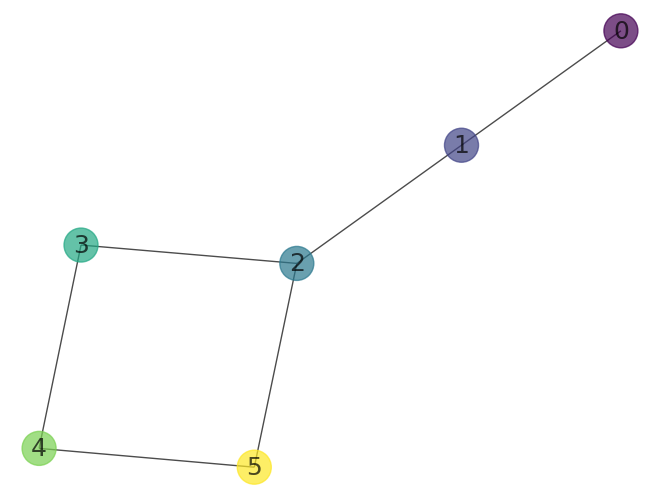

In [13]:
import networkx as nx

g=nx.random_graphs.watts_strogatz_graph(6,3,0.3)
colors = [1, 2, 3, 4, 5, 6]

nx.draw_kamada_kawai(g,with_labels=True,node_color=colors,alpha=0.7,node_size=600,font_size =18)

In [14]:
A=nx.adjacency_matrix(g).todense()
A

matrix([[0, 1, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0]], dtype=int32)

In [15]:
import numpy as np

X = np.matrix([
            [i, -i]
            for i in range(A.shape[0])
        ], dtype=float)
X        

matrix([[ 0.,  0.],
        [ 1., -1.],
        [ 2., -2.],
        [ 3., -3.],
        [ 4., -4.],
        [ 5., -5.]])

In [16]:
A*X

matrix([[ 1., -1.],
        [ 2., -2.],
        [ 9., -9.],
        [ 6., -6.],
        [ 8., -8.],
        [ 6., -6.]])

In [17]:
I=np.matrix(np.eye(A.shape[0]))  #单位矩阵
A_hat=A+I
A_hat

matrix([[1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [0., 1., 1., 1., 0., 1.],
        [0., 0., 1., 1., 1., 0.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 1., 0., 1., 1.]])

In [18]:
D=np.matrix(np.diag(np.array(A_hat.sum(axis=0))[0]))
D

matrix([[2., 0., 0., 0., 0., 0.],
        [0., 3., 0., 0., 0., 0.],
        [0., 0., 4., 0., 0., 0.],
        [0., 0., 0., 3., 0., 0.],
        [0., 0., 0., 0., 3., 0.],
        [0., 0., 0., 0., 0., 3.]])

In [19]:
D**-1*A_hat

matrix([[0.5       , 0.5       , 0.        , 0.        , 0.        ,
         0.        ],
        [0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ,
         0.        ],
        [0.        , 0.25      , 0.25      , 0.25      , 0.        ,
         0.25      ],
        [0.        , 0.        , 0.33333333, 0.33333333, 0.33333333,
         0.        ],
        [0.        , 0.        , 0.        , 0.33333333, 0.33333333,
         0.33333333],
        [0.        , 0.        , 0.33333333, 0.        , 0.33333333,
         0.33333333]])

# GCN

In [20]:
import networkx as nx

G = nx.karate_club_graph()
print( G.nodes[5]['club'])
print( G.nodes[9]['club'])

zkc=nx.karate_club_graph()
node_list = zkc.nodes()
node_label_list = []
for n in node_list:
    node_label_list.append( zkc.nodes[n]['club'])
print("node_label_list", node_label_list)

color_list =[]
for strtemp in node_label_list:
    if strtemp == 'Mr. Hi':
        color_list.append(0)
    else:
        color_list.append(1)
print("color_list", color_list)


Mr. Hi
Officer
node_label_list ['Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer']
color_list [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Epoch:0 Loss 0.7306941747665405


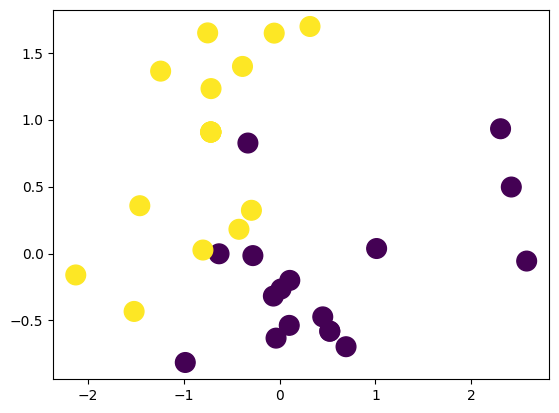

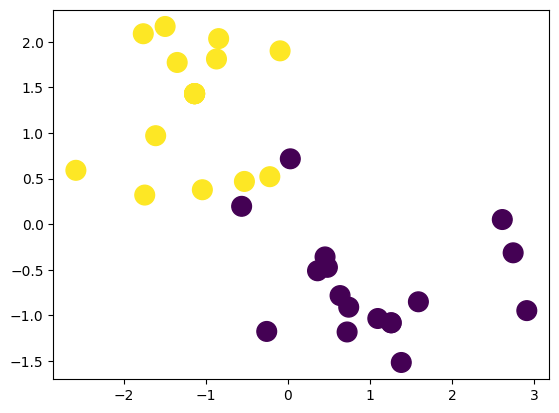

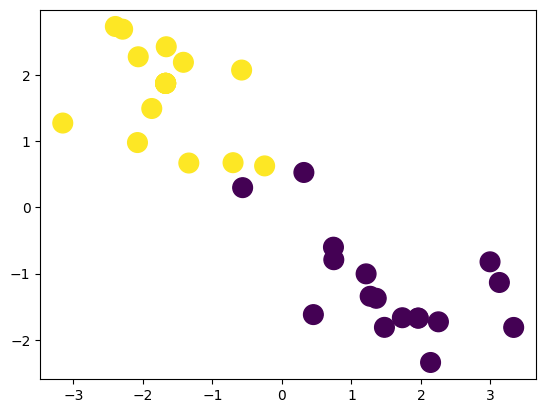

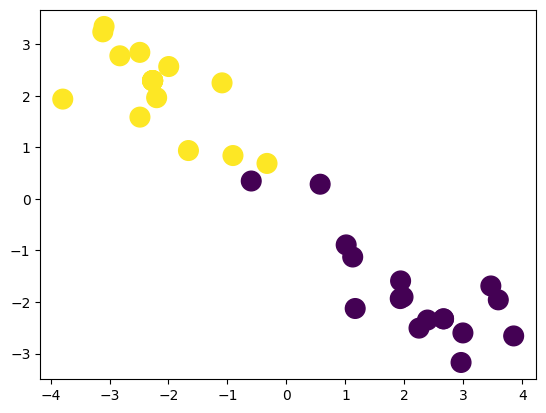

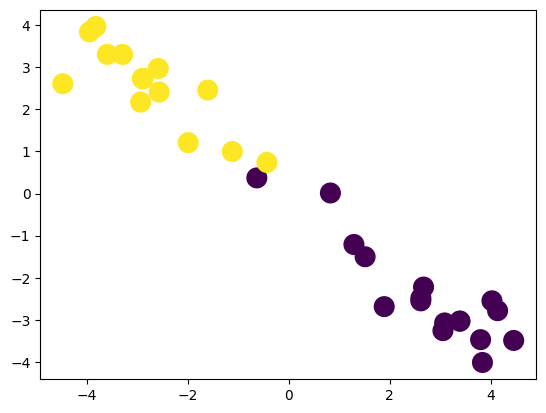

In [21]:
from networkx import karate_club_graph,to_numpy_matrix
import numpy as np
import matplotlib.pyplot as plt 
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# step1: Data preparation
zkc=karate_club_graph()
order=sorted(list(zkc.nodes()))



NODE_SIZE=len(order)
#Adjacency matrix
A=to_numpy_matrix(zkc,nodelist=order)

#identity matrix
I=np.eye(zkc.number_of_nodes())

node_label = []
for i in range(34):
        label = zkc.nodes[i]
        if label['club'] == 'Officer':
                node_label.append(1)
        else:
                node_label.append(0)
                
# step2:  Parameter Settings             
NODE_SIZE = 34
NODE_FEATURE_DIM = 34
HIDDEN_DIM1 = 10
num_classes = 2
training_epochs = 5
step = 10
lr=0.1

# step3: network define
X = tf.placeholder(tf.float32, shape=[NODE_SIZE, NODE_FEATURE_DIM])
Y = tf.placeholder(tf.int32, shape=[NODE_SIZE])
label = tf.one_hot(Y, num_classes)
Y_enc = tf.one_hot(Y, 2)

adj = tf.placeholder(tf.float32, shape=[NODE_SIZE, NODE_SIZE])
weights = {"hidden1": tf.Variable(tf.random_normal(dtype=tf.float32, shape=[NODE_FEATURE_DIM, HIDDEN_DIM1]), name='w1'),
           "hidden2": tf.Variable(tf.random_normal(dtype=tf.float32, shape=[HIDDEN_DIM1, num_classes]), 'w1')}
D_hat = tf.matrix_inverse(tf.matrix_diag(tf.reduce_sum(adj, axis=0)))
# GCN layer1
l1 = tf.matmul(tf.matmul(tf.matmul(D_hat, adj), X), weights['hidden1'])
# GCN layer2
output = tf.matmul(tf.matmul(tf.matmul(D_hat, adj), l1), weights['hidden2'])

# step4:define loss func and train
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_enc, logits=output))
train_op = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)
init_op = tf.global_variables_initializer()
feed_dict = {adj: A, X: I, Y: node_label}
with tf.Session() as sess:
        sess.run(init_op)
        # dynamic display
        plt.ion()
        for epoch in range(training_epochs):
                c, _ = sess.run([loss, train_op], feed_dict)
                if epoch % step == 0:
                        print(f'Epoch:{epoch} Loss {c}')

                represent = sess.run(output, feed_dict)
                plt.scatter(represent[:, 0], represent[:, 1], s=200, c=color_list)#g.club)
                plt.pause(0.1)
                #plt.cla()